In [1]:
%cd C:\Users\itaye\Desktop\pdexplain\pd-explain\src

C:\Users\itaye\Desktop\pdexplain\pd-explain\src


C:\Users\itaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
!pip uninstall pd-explain

In [2]:
import pandas as pd
import pd_explain

C:\Users\itaye\AppData\Local\Temp\ipykernel_17776\2046952530.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


usetex-False


In [3]:
spotify_all = (pd.read_csv(r"C:\Users\itaye\Desktop\pdexplain\pd-explain\Examples\Datasets\spotify_all.csv"))
# spotify_all = (pd.read_csv(r"C:\Users\User\Desktop\pd_explain_test\pd-explain\Examples\Datasets\spotify_all.csv"))

In [4]:
spotify_filtered = spotify_all[(spotify_all.loudness <= -28) & (spotify_all['decade'] <= 2000)]

<Axes: title={'center': "Attribute 'loudness' is skewed\nin dataframe 'spotify_all'"}, xlabel='loudness bins', ylabel='num_of_records'>

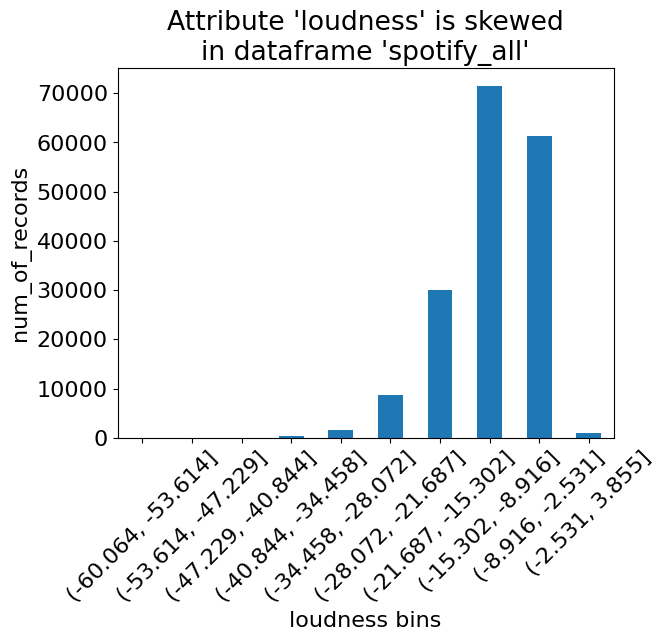

In [5]:
pd.cut(spotify_all.loudness, 10).value_counts().sort_index().plot(kind="bar",
                                                                  xlabel='loudness bins', ylabel='num_of_records', rot=45
                                                                  , title='Attribute \'loudness\' is skewed\nin dataframe \'spotify_all\'')

C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning

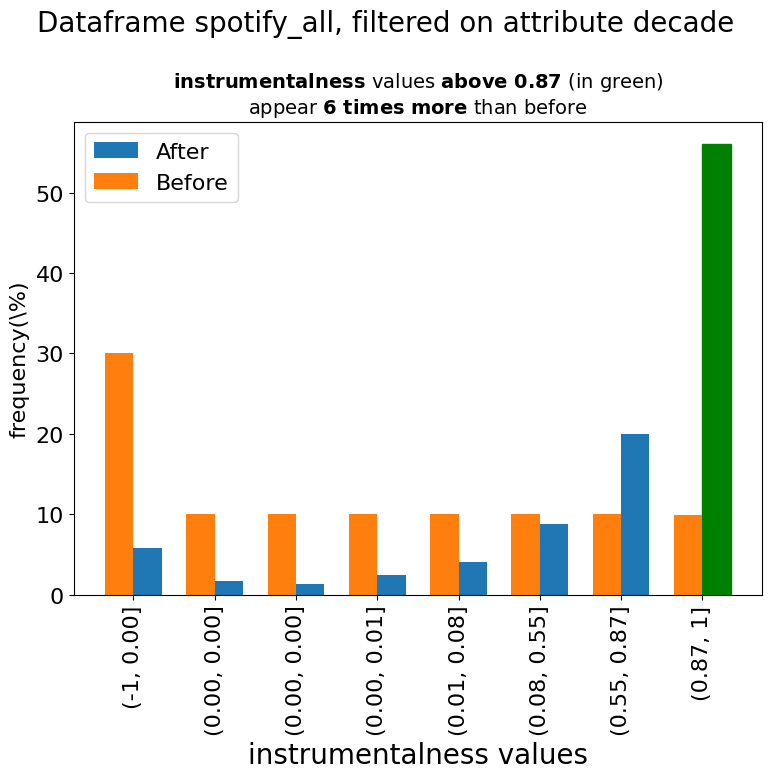

In [6]:
spotify_filtered.explain(attributes=['instrumentalness'])

<Axes: xlabel='decade'>

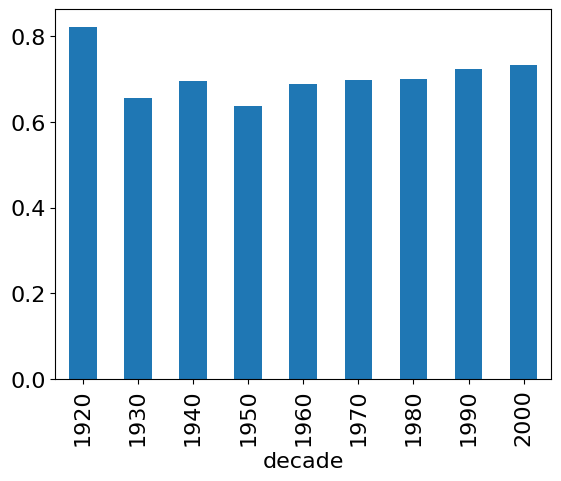

In [5]:
spotify_filtered_grouped = spotify_filtered.groupby(['decade']).instrumentalness.mean()
spotify_filtered_grouped.plot(kind='bar')

"The predicate ('popularity' = (-0.07, 7.0]) has high influence on this outlier."

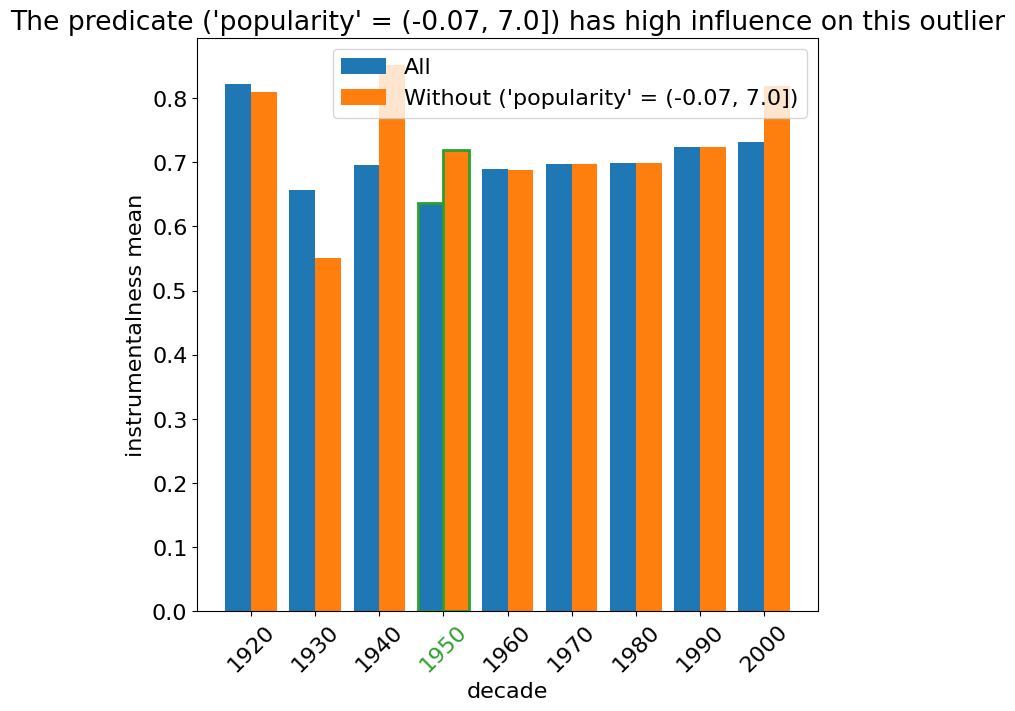

In [6]:
spotify_filtered_grouped.explain(explainer='outlier',target=1950)

In [7]:
spotify_grouped = spotify_all.groupby('decade').instrumentalness.mean()
spotify_grouped.explain()

Error 'd' with operation group by explanation


KeyError: 'd'

In [8]:
popular = spotify_all[spotify_all.popularity > 65]
popular_decades = popular['decade'].value_counts().sort_index()
popular_decades = popular_decades/popular_decades.sum()

In [9]:
grouped3_mean_by_popularity.plot(kind='bar')

NameError: name 'grouped3_mean_by_popularity' is not defined

The predicate ('explicit' = 0) has high influence on this outlier.


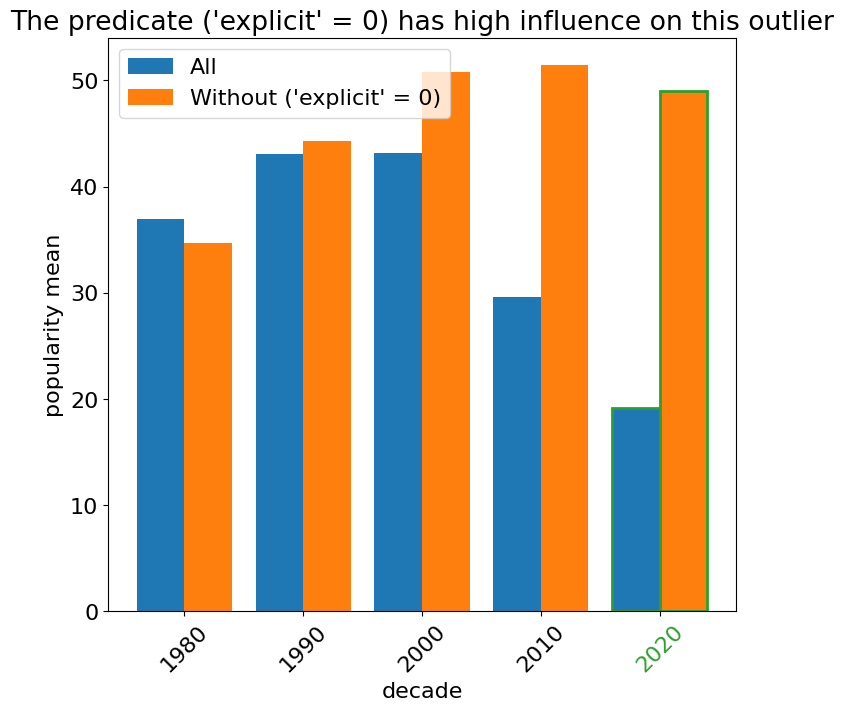

In [9]:
new_songs = spotify_all[spotify_all['decade']>1970]
grouped3 = new_songs.groupby(['decade'])
grouped3_mean_by_popularity = grouped3['popularity'].agg('mean')
print(grouped3_mean_by_popularity.explain(explainer='outlier', target=2020))

<Axes: xlabel='decade'>

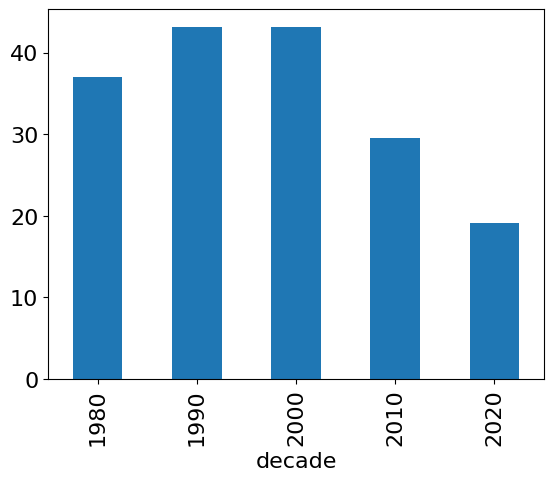

In [23]:
new_songs = spotify_all[(spotify_all['decade']>1970) & ((spotify_all['instrumentalness']>0) | (spotify_all['instrumentalness']<0.2))]
grouped3 = new_songs.groupby(['decade'])
grouped3_mean_by_popularity = grouped3['popularity'].agg('mean')
grouped3_mean_by_popularity.plot(kind='bar')

<Axes: title={'center': "Decades probability distribution shows an outlier                     \n when the data is filtered by 'popularity'>65"}, xlabel='decade', ylabel='probability'>

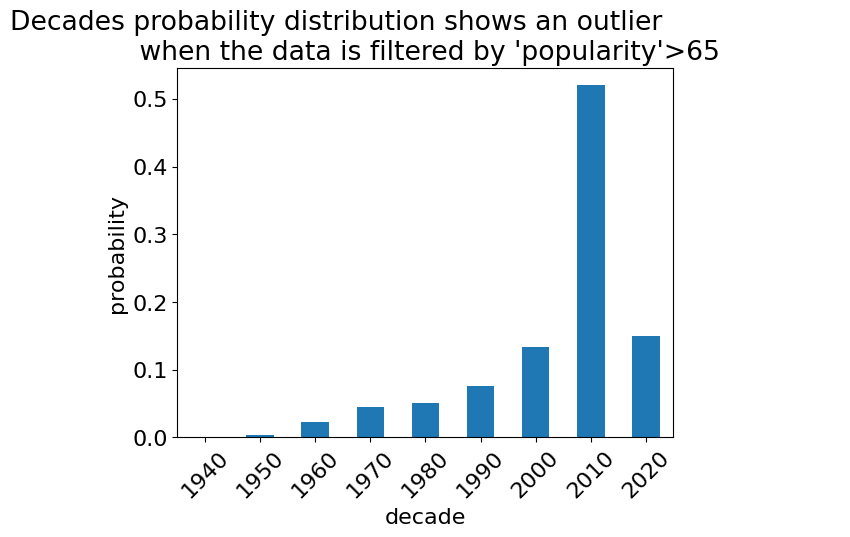

In [27]:
popular_decades.plot(kind='bar', ylabel='probability', title="Decades probability distribution shows an outlier\
                     \n when the data is filtered by \'popularity\'>65", rot=45)

C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning

replace to $$


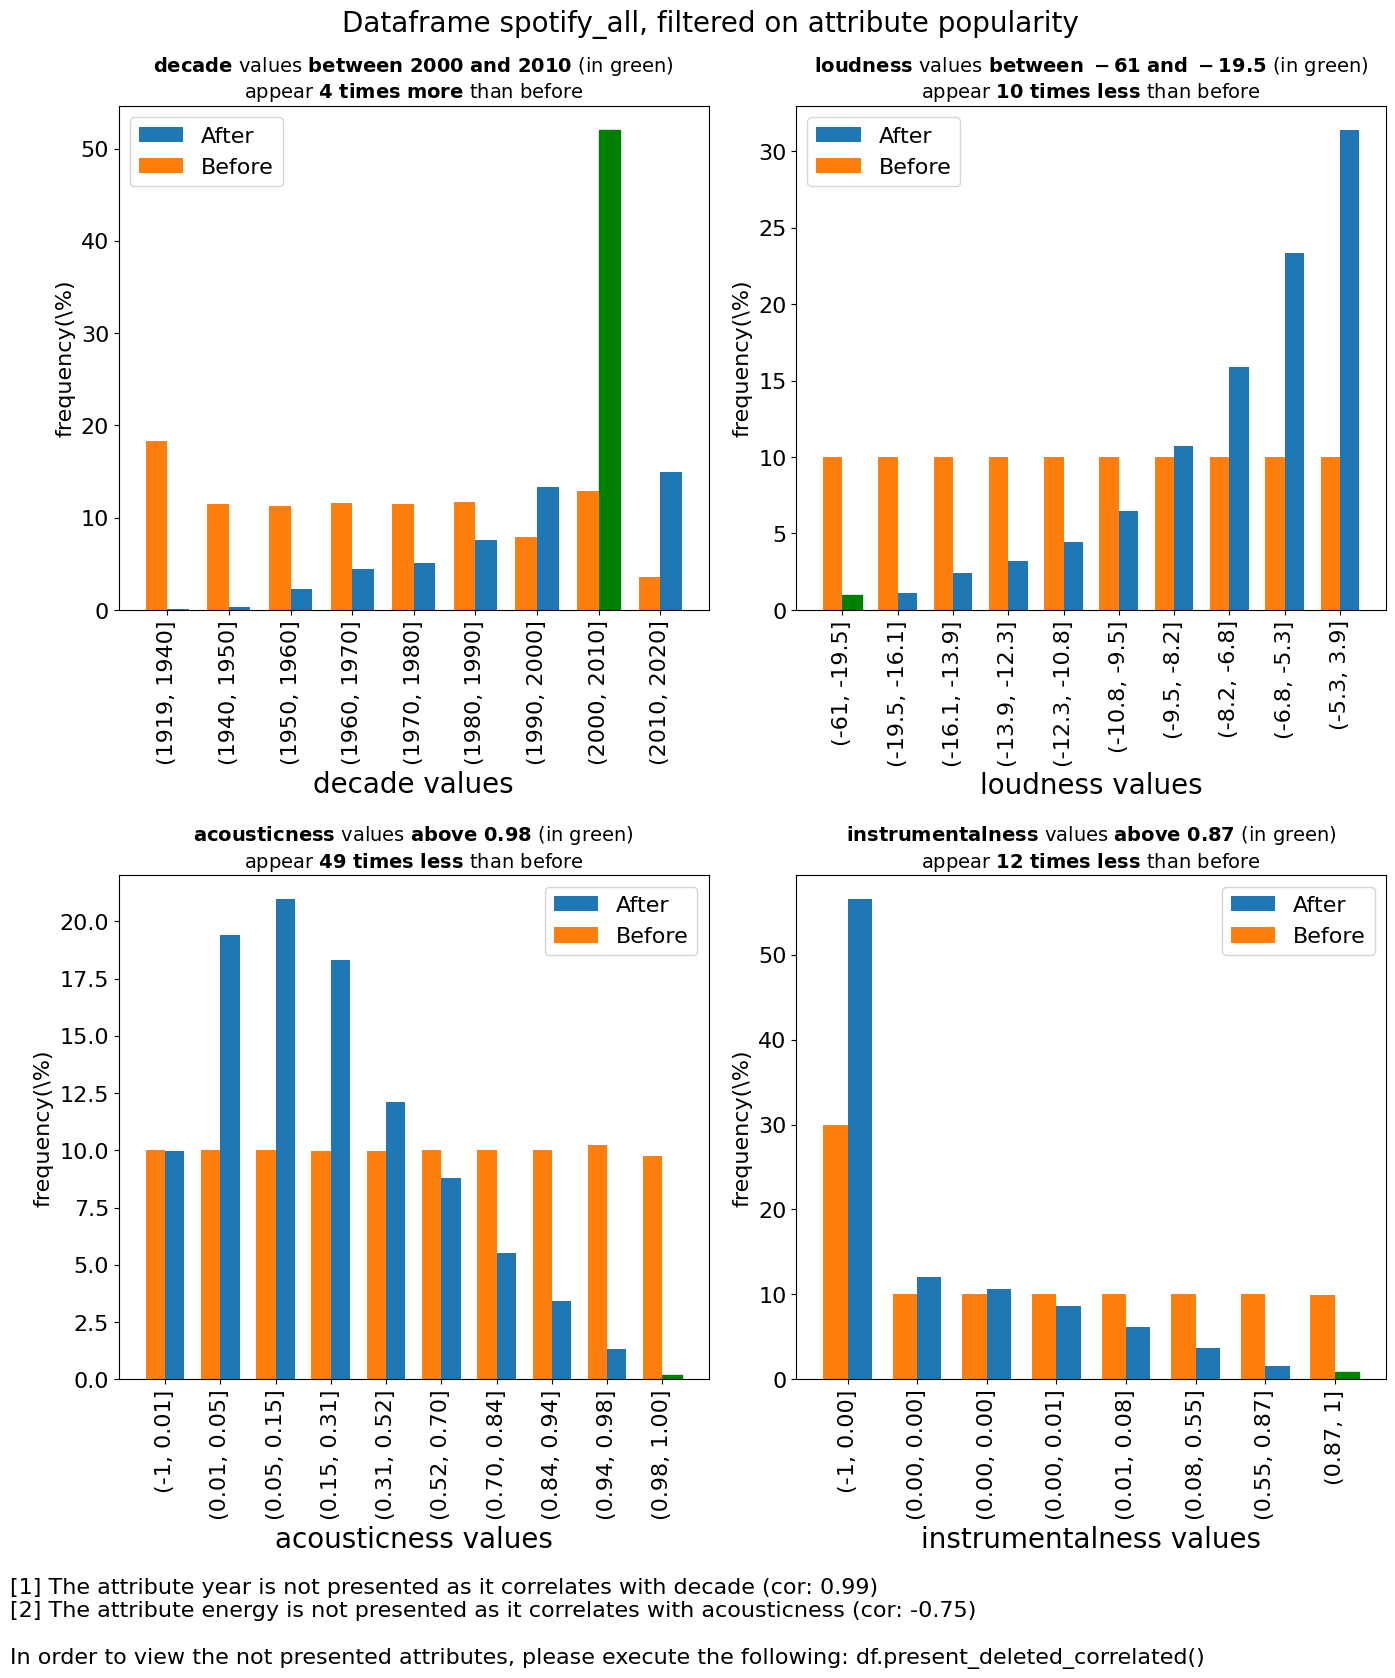

In [7]:
popular.explain(top_k=4)
# type(popular)

replace to $$


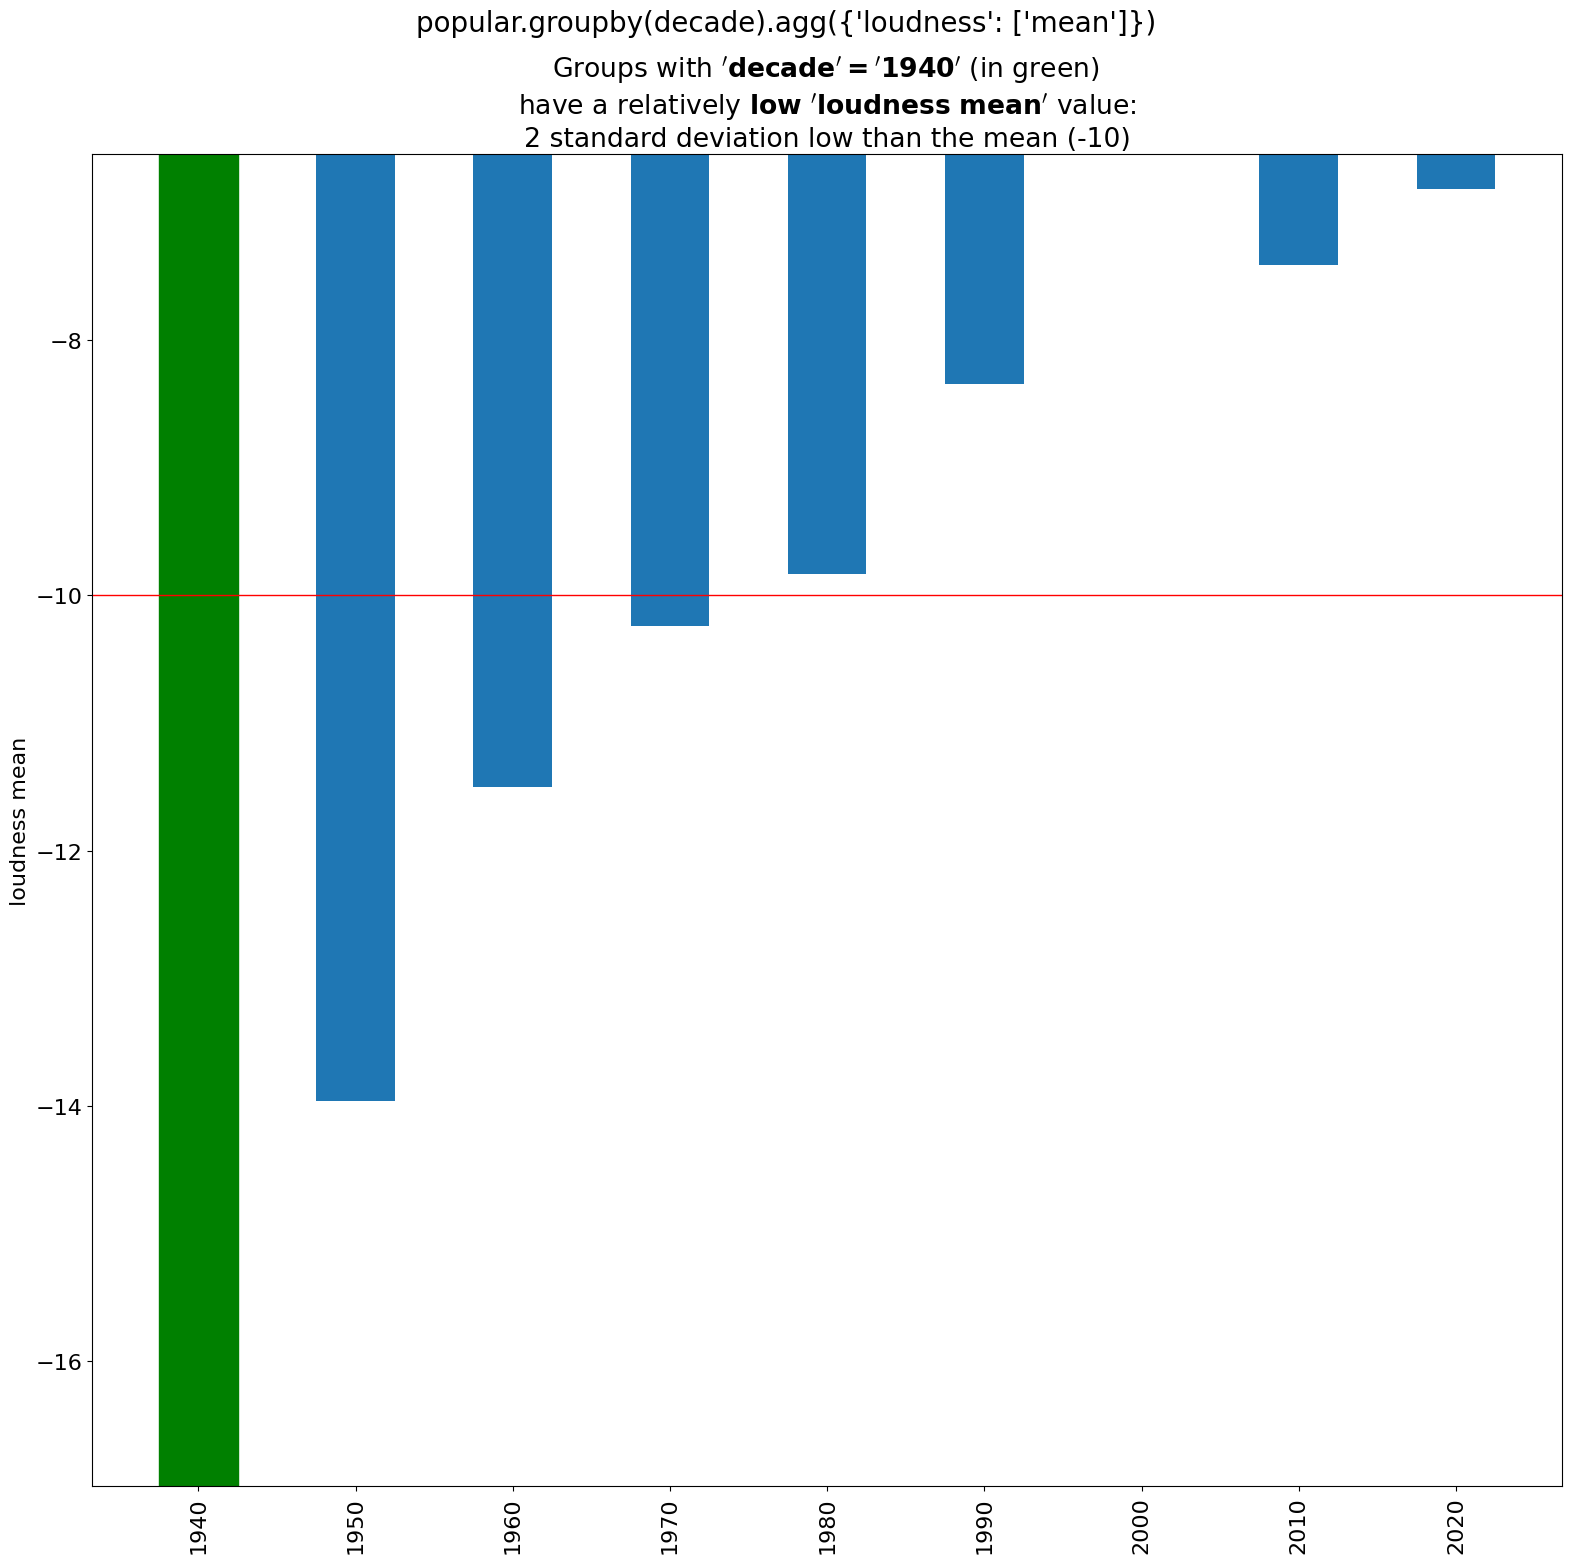

In [23]:
popular_mean_by_decade = popular.groupby('decade').loudness.mean()
popular_mean_by_decade.explain()

replace to $$


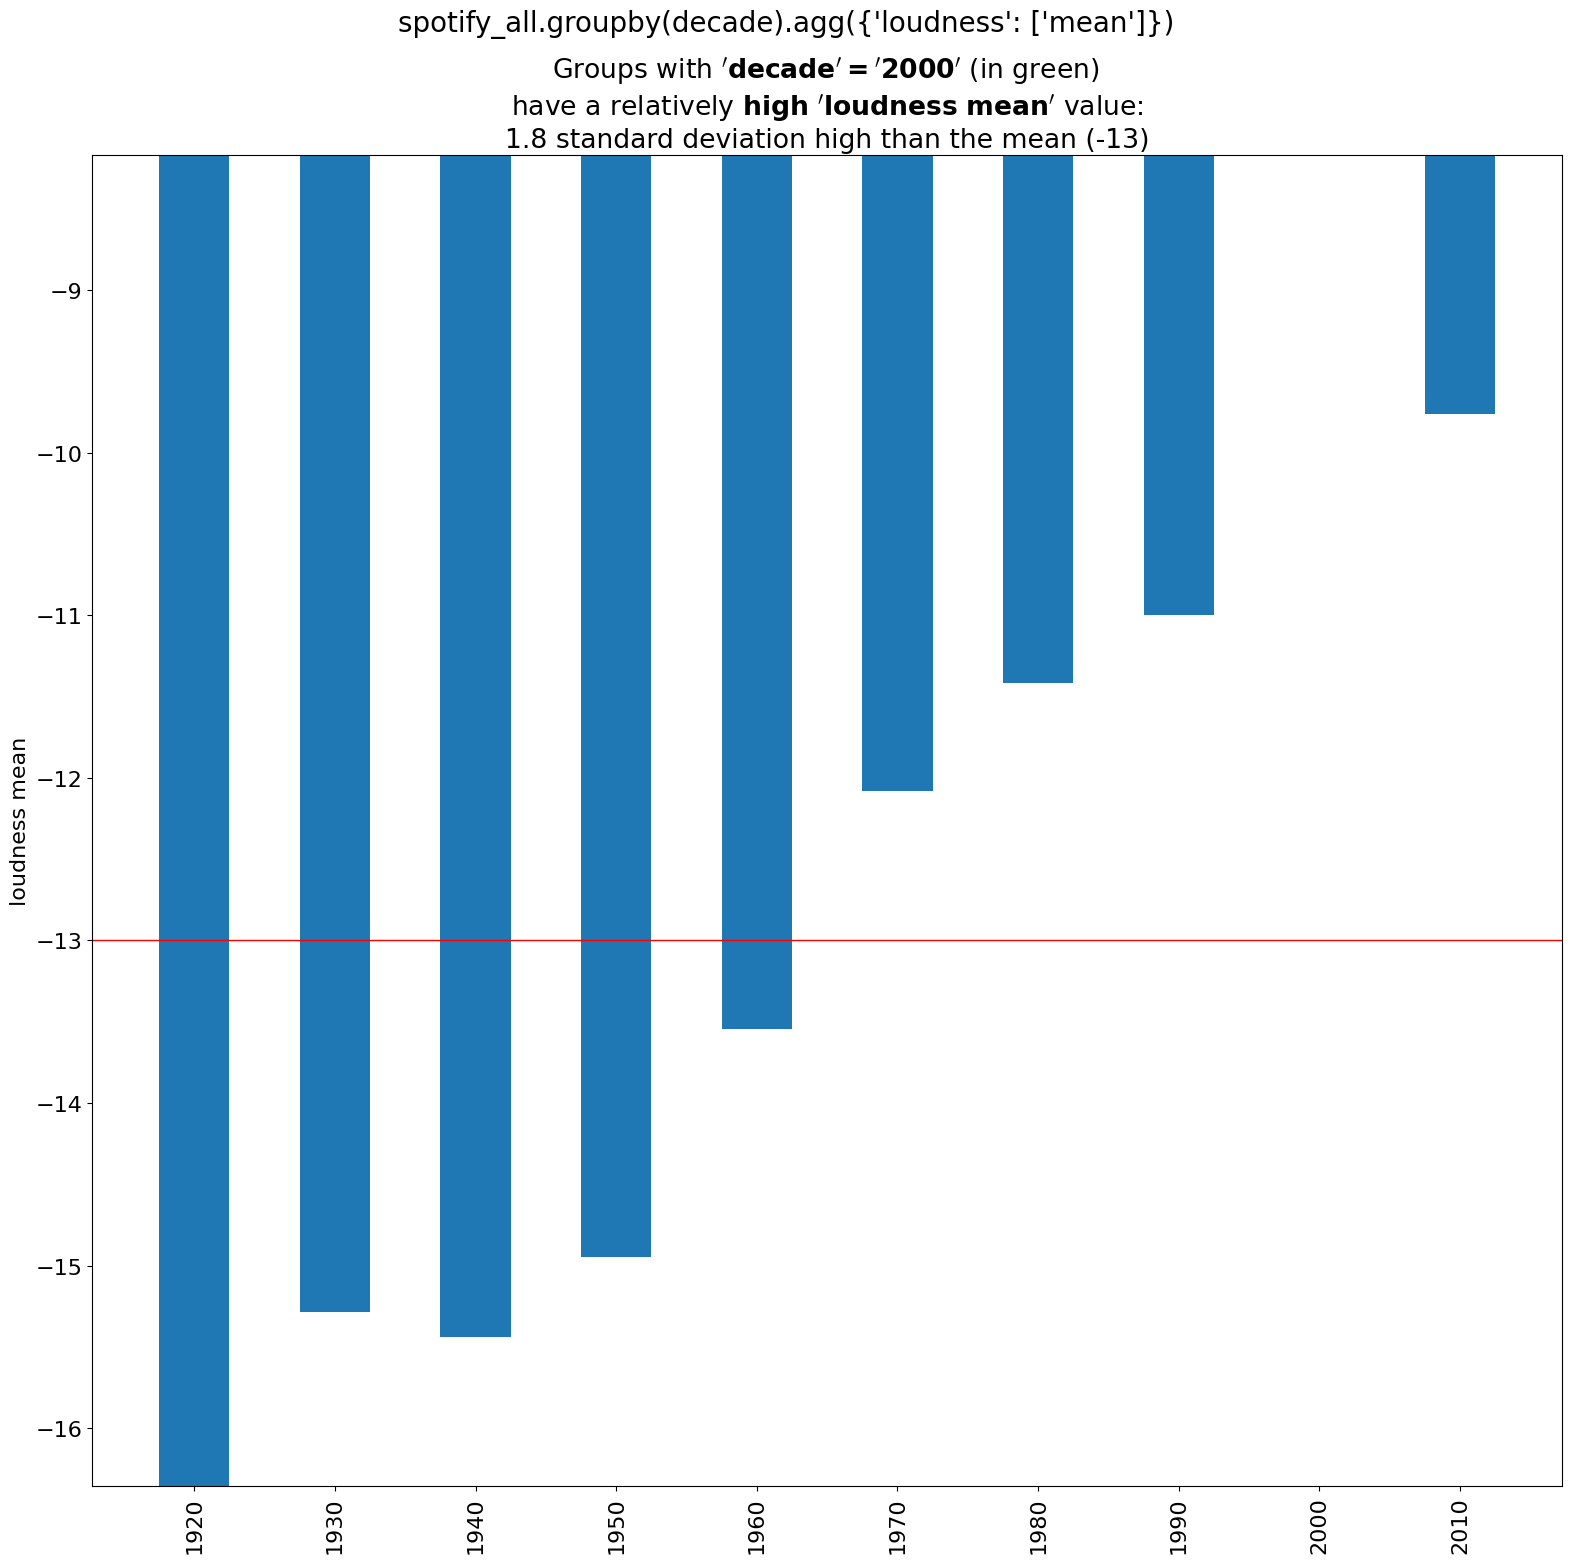

In [22]:
all_mean_by_decade = spotify_all.groupby('decade').loudness.mean()
all_mean_by_decade.explain()

<Axes: xlabel='decade'>

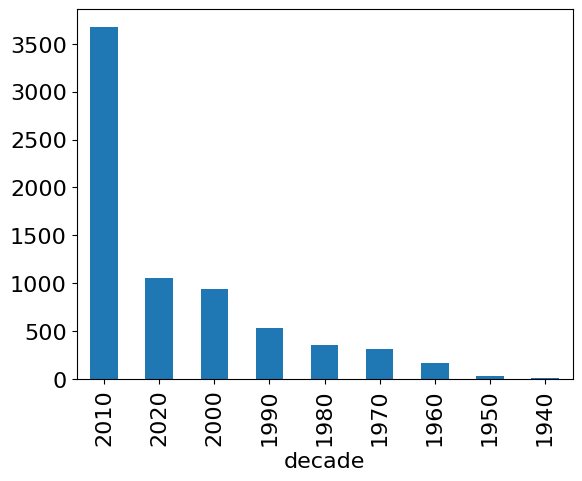

In [25]:
popular['decade'].value_counts().plot(kind='bar')